# ML with python Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

To download dataset

In [2]:
#!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

## Data description
This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


## Data Cleansing
### Data Structure 

In [3]:
df = pd.read_csv('loan_train.csv')
print(f'Shape of dataset : {df.shape}.\n')
print(f'Data types :\n{df.dtypes}\n')
print(f'Columns: \n{df.columns}')


Shape of dataset : (346, 10).

Data types :
Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

Columns: 
Index(['Unnamed: 0', 'Unnamed: 0.1', 'loan_status', 'Principal', 'terms',
       'effective_date', 'due_date', 'age', 'education', 'Gender'],
      dtype='object')


## Data preparation
- Data transformation from catagorical to numerical
- Rmoving unnecessary/unrelavent data or features

In [4]:
print(f'Data structure: \n')
df.head()

Data structure: 



,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


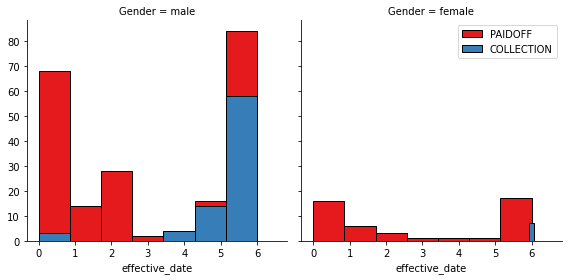

In [5]:
df['effective_date'] = pd.to_datetime(df['effective_date'])
df['effective_date'] = df['effective_date'].dt.dayofweek

bins = np.linspace(df.effective_date.min(), df.effective_date.max(),7)
#fig, axes = plt.subplots(2,2, figsize=(20,20))
gp = sns.FacetGrid(df, col='Gender',
                   hue='loan_status',
                   palette='Set1',
                   col_wrap=2, 
                   height=4,
                   aspect=1.0 )
gp.map(plt.hist, 'effective_date', bins=len(bins), ec='k')
gp.figure.savefig('delet_1.png')
gp.axes[1].legend()

It seems, who got the loan begining of the week they are pay their loan off. Let's do feature binarization with a threshold value 3.

In [7]:
# 0-> for the first 4 days
# 1-> for the last 3 days
df['effective_date'] = df['effective_date'].apply(lambda x: 1 if (x>3)  else 0)

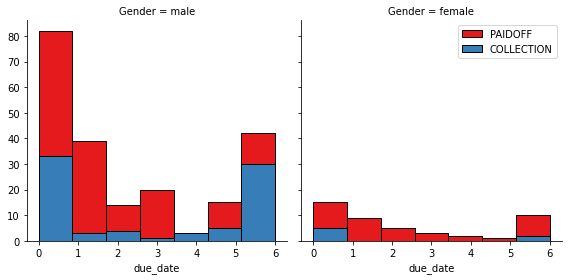

In [8]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['due_date'] = df['due_date'].dt.dayofweek

bins = np.linspace(df.due_date.min(), df.due_date.max(),7)
gp = sns.FacetGrid(df, col='Gender',
                   hue='loan_status',
                   palette='Set1',
                   col_wrap=2,
                   height=4,
                   aspect=1.0)

gp.map(plt.hist, 'due_date', bins=len(bins), ec='k')
gp.axes[-1].legend()

There is no such epecific pattern for **'loan_status'** regarding **'due_data'**. Thus we can skip this data column.

In [9]:
df.drop('due_date', axis=1, inplace=True)

Only two data samples are member of 'Master or Above' subclass, Therefore we can exclude the this subclass from our dataset. Oneway to do it transform these subclass, e.g. **'college', Bechalor**, into featurs label. 

In [10]:
kk = df.copy()
kk[kk['Principal']>=800]


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,0,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,0,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,0,27,college,male
3,4,4,PAIDOFF,1000,30,1,28,college,female
4,6,6,PAIDOFF,1000,30,1,29,college,male
...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,1,32,High School or Below,male
342,395,395,COLLECTION,1000,30,1,25,High School or Below,male
343,397,397,COLLECTION,800,15,0,39,college,male
344,398,398,COLLECTION,1000,30,0,28,college,male


In [11]:
df['Principal'].value_counts(),df['terms'].value_counts()

(1000    258
 800      81
 300       3
 900       2
 500       2
 Name: Principal, dtype: int64,
 30    184
 15    148
 7      14
 Name: terms, dtype: int64)

In [12]:
Feature = df[['loan_status', 'Principal', 'terms', 'effective_date', 
              'age', 'education', 'Gender']]
# Removin the data sample with Master or Above

Feature = Feature[Feature['education']!='Master or Above']
Feature = Feature[Feature['Principal'] >= 800]
Feature = Feature[Feature['terms'] > 7]
#Feature = pd.concat([Feature, pd.get_dummies(df['education'])], axis=1)
#Feature.drop(['Master or Above'], axis=1, inplace=True)

Feature['education'].replace(to_replace=['High School or Below', 
                                         'Bechalor', 'college'], 
                               value=[0,1,2], inplace=True)
le_gender = preprocessing.LabelEncoder().fit(['female', 'male'])
Feature['Gender']= le_gender.transform(Feature['Gender'])
Feature['loan_status'].replace(to_replace=['PAIDOFF', 'COLLECTION'], 
                               value=[1,0], inplace=True)
X = Feature.drop(['loan_status'], axis=1)
y = Feature['loan_status']

In [13]:
Feature.head()

,loan_status,Principal,terms,effective_date,age,education,Gender
0,1,1000,30,0,45,0,1
1,1,1000,30,0,33,1,0
2,1,1000,15,0,27,2,1
3,1,1000,30,1,28,2,0
4,1,1000,30,1,29,2,1


## Data Normalization and Train-test spliting

In [27]:
from sklearn.model_selection import train_test_split
X[['Principal', 'terms', 'age',]] = preprocessing.StandardScaler().fit(X[['Principal', 'terms', 'age',]]).transform(X[['Principal', 'terms', 'age',]])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [28]:
X

,Principal,terms,effective_date,age,education,Gender
0,0.565654,0.887718,0,2.339046,0,1
1,0.565654,0.887718,0,0.333278,1,0
2,0.565654,-1.126484,0,-0.669605,2,1
3,0.565654,0.887718,1,-0.502458,2,0
4,0.565654,0.887718,1,-0.335311,2,1
...,...,...,...,...,...,...
341,-1.775228,-1.126484,1,0.166131,0,1
342,0.565654,0.887718,1,-1.003900,0,1
343,-1.775228,-1.126484,0,1.336162,2,1
344,0.565654,0.887718,0,-0.502458,2,1


## Classification Algorithm
### K-Nearest Neighbour

In [29]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import jaccard_score, f1_score, log_loss, confusion_matrix

In [30]:
k = range(20)[3:]
jac_metrics = []
log_metrics = []
f1_metrics = []
for i in k: 
    
    knc = KNeighborsClassifier(n_neighbors=i, p=2)
    knc.fit(X_train, y_train)
    y_hat = knc.predict(X_test)
    
    ja = jaccard_score(y_true=y_test, y_pred=y_hat)
    jac_metrics.append(ja)
    ll = 1-log_loss(y_true=y_test, y_pred=y_hat) /len(y_test)
    log_metrics.append(ll)
    f1 = f1_score(y_true=y_test, y_pred=y_hat)
    f1_metrics.append(f1)

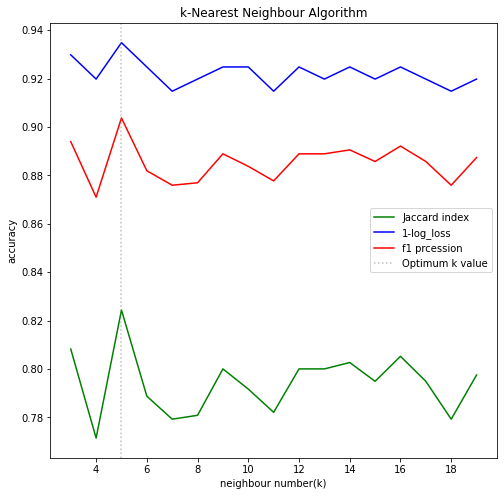

In [31]:
k_best = []
k_best.append(k[jac_metrics.index(max(jac_metrics))])
k_best.append(k[log_metrics.index(max(log_metrics))])
k_best.append(k[f1_metrics.index(max(f1_metrics))])
k_best = max(k_best, key = k_best.count)

plt.figure(figsize=(8,8))
plt.plot(k, jac_metrics, 'g', label='Jaccard index')
plt.plot(k, log_metrics, 'b', label='1-log_loss')
plt.plot(k, f1_metrics, 'r', label='f1 prcession')
plt.xlabel('neighbour number(k)')
plt.ylabel('accuracy')
plt.title('k-Nearest Neighbour Algorithm')
plt.axvline(k_best, ls=':', alpha=0.5, color='gray', label='Optimum k value')
plt.legend()

#### Calclating the confusion matrix

In [32]:
knc = KNeighborsClassifier(n_neighbors=k_best, p=2)
knc.fit(X_train, y_train)
y_hat = knc.predict(X_test)

Conf_matr = np.zeros(shape=(2,2), dtype=int)
for (i,j) in zip(y_test, y_hat):
    if i==0:
        if j==0:
            Conf_matr[0,0] = Conf_matr[0, 0] + 1
        else:
            Conf_matr[0,1] = Conf_matr[0, 1] + 1
    else:
        if j==0: 
            Conf_matr[1,0] = Conf_matr[1,0] + 1
        else:
            Conf_matr[1,1] = Conf_matr[1,1] + 1
#Conf_matr==confusion_matrix(y_true=y_test, y_pred=y_hat)

In [33]:
ja = jaccard_score(y_true=y_test, y_pred=y_hat)
ll = 1-log_loss(y_true=y_test, y_pred=y_hat) /len(y_test)
f1 = f1_score(y_true=y_test, y_pred=y_hat)

print(' Metrics for KNeighborsClassifier --')
print(' Jaccard score : ', ja)
print(' 1-logloss : ', ll)
print(' F1 score : ', f1)

 Metrics for KNeighborsClassifier --
 Jaccard score :  0.8243243243243243
 1-logloss :  0.9348219931033952
 F1 score :  0.9037037037037037


In [34]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 9  9]
 [ 4 61]]


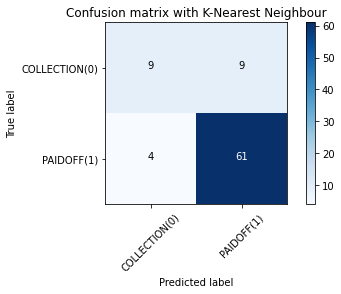

In [35]:
plot_confusion_matrix(cm=Conf_matr,
                      title='Confusion matrix with K-Nearest Neighbour',
                       classes=['COLLECTION(0)', 'PAIDOFF(1)'])

### Decision Tree Algorithm

In [36]:
from sklearn.tree import DecisionTreeClassifier
criterion = 'gini'#'entropy'
dtc = DecisionTreeClassifier(criterion=criterion)
dtc.fit(X_train, y_train)
y_hat = dtc.predict(X_test)


In [37]:
ja = jaccard_score(y_true=y_test, y_pred=y_hat)
ll = 1-log_loss(y_true=y_test, y_pred=y_hat) /len(y_test)
f1 = f1_score(y_true=y_test, y_pred=y_hat)

print(' Metrics for Decision Tree Algorithm--')
print(' Jaccard score : ', ja)
print(' 1-logloss : ', ll)
print(' F1 score : ', f1)

 Metrics for Decision Tree Algorithm--
 Jaccard score :  0.7638888888888888
 1-logloss :  0.914767775309117
 F1 score :  0.8661417322834646


In [38]:
y_test.value_counts()

1    65
0    18
Name: loan_status, dtype: int64

Confusion matrix, without normalization
[[11  7]
 [10 55]]


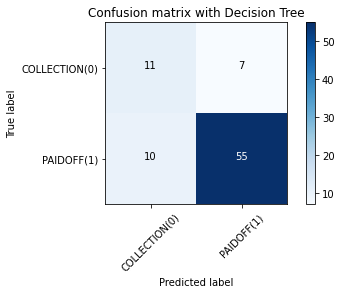

In [39]:
Conf_matr = confusion_matrix(y_true=y_test, 
                 y_pred=y_hat)

plot_confusion_matrix(cm=Conf_matr,
                      title='Confusion matrix with Decision Tree',
                      classes=['COLLECTION(0)', 'PAIDOFF(1)'])

### Support Vector Machine Algorithm

#### With rbf kernel

In [40]:
from sklearn import svm
svm_al = svm.SVC(kernel='rbf', gamma='scale')
svm_al.fit(X_train, y_train)

y_hat = svm_al.predict(X_test)

In [41]:
ja = jaccard_score(y_true=y_test, y_pred=y_hat)
ll = 1-log_loss(y_true=y_test, y_pred=y_hat) /len(y_test)
f1 = f1_score(y_true=y_test, y_pred=y_hat)

print(' Metrics for Support Vector Machine with rbf kernel --')
print(' Jaccard score : ', ja)
print(' 1-logloss : ', ll)
print(' F1 score : ', f1)

 Metrics for Support Vector Machine with rbf kernel --
 Jaccard score :  0.7831325301204819
 1-logloss :  0.9097528860702372
 F1 score :  0.8783783783783784


Confusion matrix, without normalization
[[ 0 18]
 [ 0 65]]


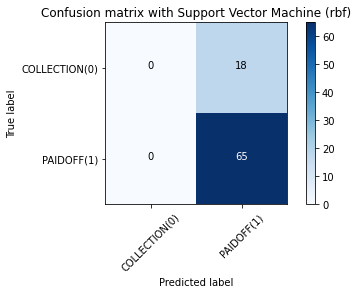

In [42]:
Conf_matr = confusion_matrix(y_true=y_test, 
                 y_pred=y_hat)

plot_confusion_matrix(cm=Conf_matr,
                      title='Confusion matrix with Support Vector Machine (rbf)',
                      classes=['COLLECTION(0)', 'PAIDOFF(1)'])

#### With polynomial (poly) kernel

In [43]:
#{'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}
from sklearn import svm
svm_al = svm.SVC(kernel='poly', degree=9)
svm_al.fit(X_train, y_train)

y_hat = svm_al.predict(X_test)

In [44]:
ja = jaccard_score(y_true=y_test, y_pred=y_hat)
ll = 1-log_loss(y_true=y_test, y_pred=y_hat) /len(y_test)
f1 = f1_score(y_true=y_test, y_pred=y_hat)

print(' Metrics for Support Vector Machine with poly kernel --')
print(' Jaccard score : ', ja)
print(' 1-logloss : ', ll)
print(' F1 score : ', f1)

 Metrics for Support Vector Machine with poly kernel --
 Jaccard score :  0.759493670886076
 1-logloss :  0.9047397378621969
 F1 score :  0.8633093525179857


Confusion matrix, without normalization
[[ 4 14]
 [ 5 60]]


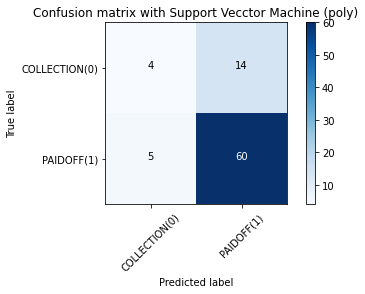

In [45]:
Conf_matr = confusion_matrix(y_true=y_test, 
                 y_pred=y_hat)

plot_confusion_matrix(cm=Conf_matr,
                      title='Confusion matrix with Support Vecctor Machine (poly)',
                      classes=['COLLECTION(0)', 'PAIDOFF(1)'])

### Clssification with Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lr = LogisticRegression(C=0.1, solver='liblinear').fit(X_train,y_train)

y_hat = lr.predict(X_test)

In [47]:
ja = jaccard_score(y_true=y_test, y_pred=y_hat)
ll = 1-log_loss(y_true=y_test, y_pred=y_hat) /len(y_test)
f1 = f1_score(y_true=y_test, y_pred=y_hat)

print(' Metrics for Support Vector Machine with poly kernel --')
print(' Jaccard score : ', ja)
print(' 1-logloss : ', ll)
print(' F1 score : ', f1)

 Metrics for Support Vector Machine with poly kernel --
 Jaccard score :  0.7926829268292683
 1-logloss :  0.9147666146218907
 F1 score :  0.8843537414965986


Confusion matrix, without normalization
[[ 1 17]
 [ 0 65]]


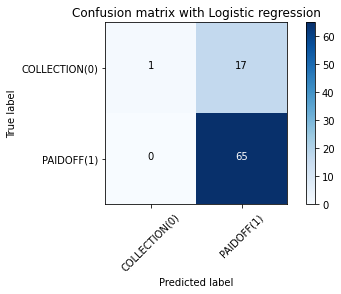

In [48]:
Conf_matr = confusion_matrix(y_true=y_test, 
                 y_pred=y_hat)

plot_confusion_matrix(cm=Conf_matr,
                      title='Confusion matrix with Logistic regression',
                      classes=['COLLECTION(0)', 'PAIDOFF(1)'])